In [1]:
%load_ext autoreload
%autoreload 2

# Experiments with TEASER-EASE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_ease import TEASER_EASE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_EASE

L2_EASE = 10
L2_1 = 500
L2_2 = 50000
RHO = 1000
DELTA = 0
MAX_ITER = 10
HYPERPARAMS = {'l2_ease': L2_EASE, 'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_ease': 10,
 'l2_1': 500,
 'l2_2': 50000,
 'rho': 1000,
 'delta': 0,
 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Evaluate model on test set

In [8]:
%%time
alg = ALG(**HYPERPARAMS)
alg.fit(X, S)

Decompose XTX
Decompose DTD


norm E 0.07669366399801096
diag norm: 0.18003174226815033
diag_diff: 0.18003174226815033

norm E 0.0731307986138746
diag norm: 0.16779351583014077
diag_diff: 0.16779308035476556
rho * change E: 4.513214418564987

norm E 0.06990921250416259
diag norm: 0.15674290682466535
diag_diff: 0.15674123245897487
rho * change E: 4.133515514214311

norm E 0.06699078068409459
diag norm: 0.14672511022107898
diag_diff: 0.1466787519676885
rho * change E: 3.798050927815055

norm E 0.06434520804365418
diag norm: 0.13762011870698282
diag_diff: 0.1370656915374678
rho * change E: 3.497286529397503

norm E 0.061968074851912504
diag norm: 0.12943905556136567
diag_diff: 0.12821699593648236
rho * change E: 3.204209541940055

norm E 0.05983058258268388
diag norm: 0.12208268209370003
diag_diff: 0.12015329602211003
rho * change E: 2.9506211138578173

norm E 0.0579036123436321
diag norm: 0.11544427980279477
diag_diff: 0.11250869463629783
rho * change E: 2.716259068729214

norm E 0.05618354624872604
diag norm: 0.1094

In [9]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 1500 users
Average Recall@20 0.495
Average Recall@100 0.642
Average nDCG@100 0.326


## Plot amount of items from long tail recommended

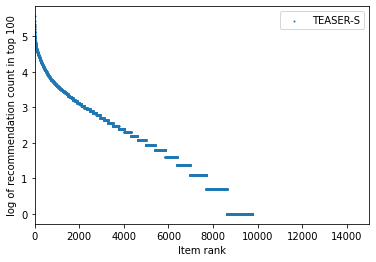

In [10]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)